# StarSpace

Each topic is thus identified by a vector $vec^t_j$ defined by the $N$-dimensional embedding for topic j, learned with the StarSpace model by observing scientists publication patterns in time window $t$. In this model, entity embeddings are learned using discrete feature representations describing the relations between the selected entities.

In [1]:
import sys
sys.path.append("../")
from lib.rs import research_space

In [2]:
key = "sjr"
rs = research_space(key)
rs.load(2011)
rs.load_star_space(200)

[[0.         0.         0.         ... 0.00395257 0.00068306 0.00117739]
 [0.         0.         0.         ... 0.         0.00273224 0.00117739]
 [0.         0.         0.         ... 0.00263505 0.00136612 0.        ]
 ...
 [0.01321586 0.         0.00193424 ... 0.         0.00478142 0.00274725]
 [0.00440529 0.01197605 0.00193424 ... 0.00922266 0.         0.18877551]
 [0.01321586 0.00898204 0.         ... 0.00922266 0.32855191 0.        ]]


In [4]:
import pandas as pd
areas = pd.read_pickle("../../dataset/SJR/areas.pkl")
areas.head()

,Code,Field,Subject area,Classification
0,1000.0,multidisciplinary,health sciences,multidisciplinary
1,1100.0,general agricultural and biological sciences,life sciences,agricultural and biological sciences
2,1101.0,agricultural and biological sciences (miscella...,life sciences,agricultural and biological sciences
3,1102.0,agronomy and crop science,life sciences,agricultural and biological sciences
4,1103.0,animal science and zoology,life sciences,agricultural and biological sciences


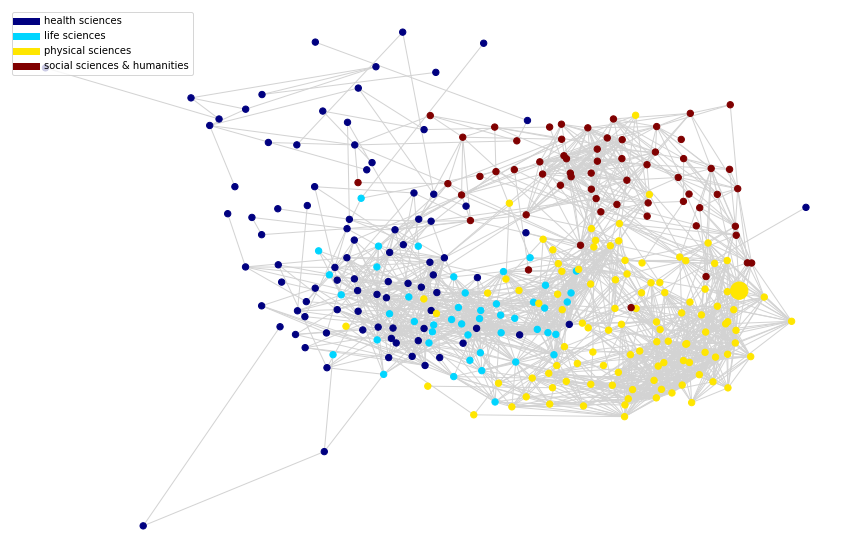

In [8]:
dict_area = areas[["Field", "Subject area"]].set_index("Field").to_dict()["Subject area"]
unique = areas["Subject area"].unique()
subs = {u: v for v,u in enumerate(sorted(unique))}
values = [subs[dict_area[node]] for node in rs.fields]

pos = rs.plot(values, labels=subs, threshold=0.4)